# World Happiness Report
By Darshik A S

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context('notebook')
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
data.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
# Count of each distict countries 
data.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [6]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Some variables are skewed, so we can either apply log transformation or dropping the columns later on analysis

In [7]:
np.round(data.describe().T,2)

count   mean    std   min    25%    50%  \
Happiness Rank                 158.0  79.49  45.75  1.00  40.25  79.50   
Happiness Score                158.0   5.38   1.15  2.84   4.53   5.23   
Standard Error                 158.0   0.05   0.02  0.02   0.04   0.04   
Economy (GDP per Capita)       158.0   0.85   0.40  0.00   0.55   0.91   
Family                         158.0   0.99   0.27  0.00   0.86   1.03   
Health (Life Expectancy)       158.0   0.63   0.25  0.00   0.44   0.70   
Freedom                        158.0   0.43   0.15  0.00   0.33   0.44   
Trust (Government Corruption)  158.0   0.14   0.12  0.00   0.06   0.11   
Generosity                     158.0   0.24   0.13  0.00   0.15   0.22   
Dystopia Residual              158.0   2.10   0.55  0.33   1.76   2.10   

                                  75%     max  
Happiness Rank                 118.75  158.00  
Happiness Score                  6.24    7.59  
Standard Error                   0.05    0.14  
Economy (GDP per Capita)         1.16    1.69  
Family                           1.21    1.40  
Health (Life Expectancy)         0.81    1.03  
Freedom                          0.55    0.67  
Trust (Government Corruption)    0.18    0.55  
Generosity                       0.31    0.80  
Dystopia Residual                2.46    3.60

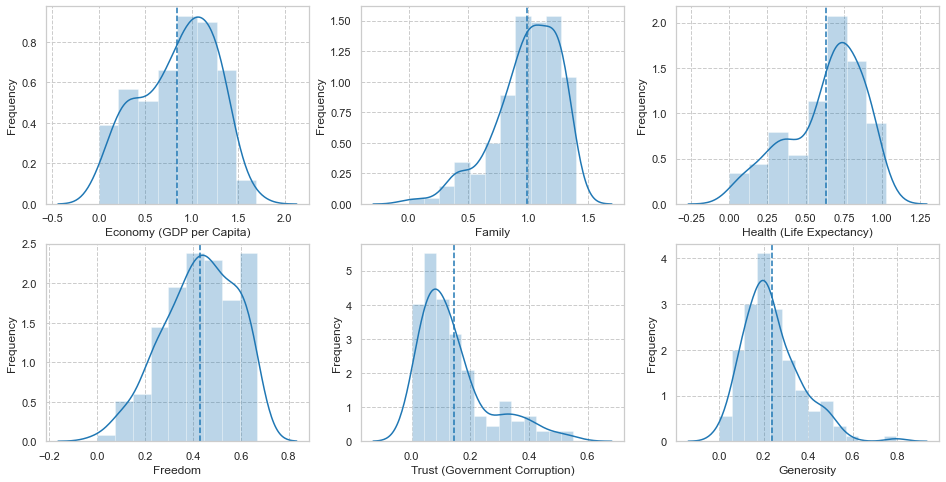

In [8]:
# Plotting distribtuion of each factors contributing to the happiness score
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
sns.distplot(data['Economy (GDP per Capita)'],hist_kws={'alpha':0.3})
plt.axvline(data['Economy (GDP per Capita)'].mean(),linestyle='dashed')
plt.ylabel('Frequency')

plt.subplot(2,3,2)
sns.distplot(data['Family'],hist_kws={'alpha':0.3})
plt.axvline(data['Family'].mean(),linestyle='dashed')
plt.ylabel('Frequency')

plt.subplot(2,3,3)
sns.distplot(data['Health (Life Expectancy)'],hist_kws={'alpha':0.3})
plt.axvline(data['Health (Life Expectancy)'].mean(),linestyle='dashed')
plt.ylabel('Frequency')

plt.subplot(2,3,4)
sns.distplot(data['Freedom'],hist_kws={'alpha':0.3})
plt.axvline(data['Freedom'].mean(),linestyle='dashed')
plt.ylabel('Frequency')

plt.subplot(2,3,5)
sns.distplot(data['Trust (Government Corruption)'],hist_kws={'alpha':0.3})
plt.axvline(data['Trust (Government Corruption)'].mean(),linestyle='dashed')
plt.ylabel('Frequency')

plt.subplot(2,3,6)
sns.distplot(data['Generosity'],hist_kws={'alpha':0.3})
plt.axvline(data['Generosity'].mean(),linestyle='dashed')
plt.ylabel('Frequency')

plt.show()

It seems some of the attributes appear to be normaly distributed. 

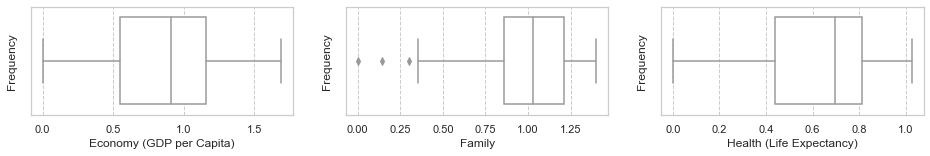

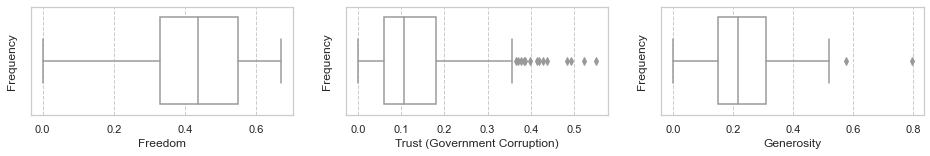

In [9]:
plt.figure(figsize=(16,2))

plt.subplot(1,3,1)
sns.boxplot(data['Economy (GDP per Capita)'],color='white')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.boxplot(data['Family'],color='white')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data['Health (Life Expectancy)'],color='white')
plt.ylabel('Frequency')

plt.show()

plt.figure(figsize=(16,2))

plt.subplot(1,3,1)
sns.boxplot(data['Freedom'],color='white')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.boxplot(data['Trust (Government Corruption)'],color='white')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data['Generosity'],color='white')
plt.ylabel('Frequency')

plt.show()

There are few outliers in  Family, Trust and generosity attributes

In [10]:
def detect_outlier(dat):
    n = dat.quantile(0.25)
    x = dat.quantile(0.75)
    IQR = x - n
    a,b = (n - 1.5 * IQR) , (x + 1.5 * IQR)
    return ((dat < a) | (dat > b))

In [11]:
# Countries which are extremely generous
data[detect_outlier(data['Generosity'])].sort_values(
    'Generosity',ascending=False)[['Country','Happiness Rank','Generosity']]

Country  Happiness Rank  Generosity
128   Myanmar             129     0.79588
33   Thailand              34     0.57630

* Myanmar and Thailand are the countries with the most generous people.
* Though Myanmar has very high generosity, the country has very low happiness score
* Countries with higher ranks hasn't come in this list of extremely generous countries, which means other factors must have highly contributed to the score.

In [12]:
# Countries with extremely low social support
data[detect_outlier(data['Family'])][['Country','Happiness Rank','Family']]

Country  Happiness Rank   Family
147  Central African Republic             148  0.00000
152               Afghanistan             153  0.30285
157                      Togo             158  0.13995

* These are the countries with less social support. 
* Ranks of these countries are in the lasts of the list. It seems, social support has a huge role in contributing to the country happiness score

In [13]:
# Countries with low corruption
data[detect_outlier(data['Trust (Government Corruption)'])].sort_values(
    'Trust (Government Corruption)',ascending=False)[['Country','Happiness Rank','Trust (Government Corruption)']]

Country  Happiness Rank  Trust (Government Corruption)
153                Rwanda             154                        0.55191
27                  Qatar              28                        0.52208
23              Singapore              24                        0.49210
2                 Denmark               3                        0.48357
7                  Sweden               8                        0.43844
8             New Zealand               9                        0.42922
0             Switzerland               1                        0.41978
5                 Finland               6                        0.41372
90      Somaliland region              91                        0.39928
19   United Arab Emirates              20                        0.38583
129               Georgia             130                        0.38331
16             Luxembourg              17                        0.37798
71              Hong Kong              72                        0.37124
3                  Norway               4                        0.36503

* These country has very least corruption in the government
* There are some countries with lower ranks, but with highest trust on their government.

In [14]:
# Number of countries having happiness score greaater than 6 in each region
data[data['Happiness Score'] > 6].groupby('Region')['Country'].count().rename('Number of Countries').to_frame()

Number of Countries
Region                                              
Australia and New Zealand                          2
Central and Eastern Europe                         2
Eastern Asia                                       1
Latin America and Caribbean                       13
Middle East and Northern Africa                    6
North America                                      2
Southeastern Asia                                  2
Western Europe                                    16

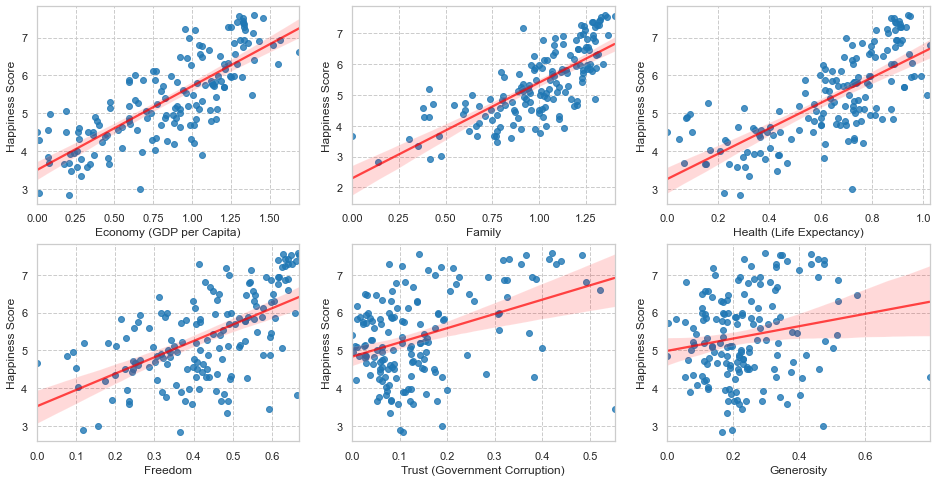

In [15]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
sns.regplot(data=data,y='Happiness Score', x='Economy (GDP per Capita)',line_kws={'color':'r','alpha':0.7},order=1)

plt.subplot(2,3,2)
sns.regplot(data=data,y='Happiness Score', x='Family',line_kws={'color':'r','alpha':0.7},order=1)

plt.subplot(2,3,3)
sns.regplot(data=data,y='Happiness Score', x='Health (Life Expectancy)',line_kws={'color':'r','alpha':0.7},order=1)

plt.subplot(2,3,4)
sns.regplot(data=data,y='Happiness Score', x='Freedom',line_kws={'color':'r','alpha':0.7},order=1)

plt.subplot(2,3,5)
sns.regplot(data=data,y='Happiness Score', x='Trust (Government Corruption)',line_kws={'color':'r','alpha':0.7},order=1)

plt.subplot(2,3,6)
sns.regplot(data=data,y='Happiness Score', x='Generosity',line_kws={'color':'r','alpha':0.7},order=1)

plt.show()

From, the regression plot we can see that, Economy, Familty, Health and Freedom vs the Hapiness Score is almost linear.

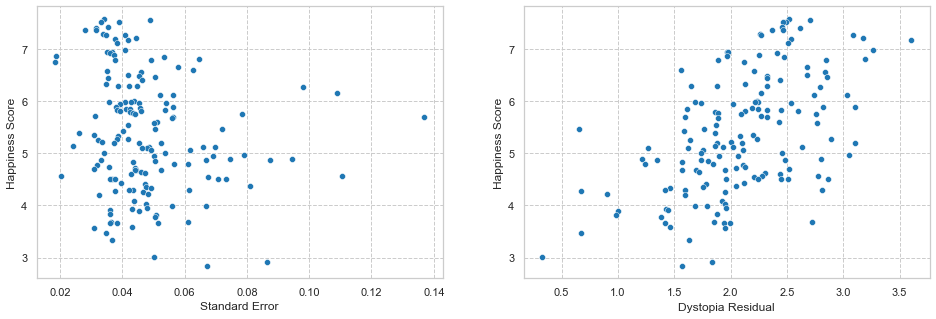

In [19]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.scatterplot(data=data,y='Happiness Score',x='Standard Error')

plt.subplot(1,2,2)
sns.scatterplot(data=data,y='Happiness Score',x='Dystopia Residual')

plt.show()

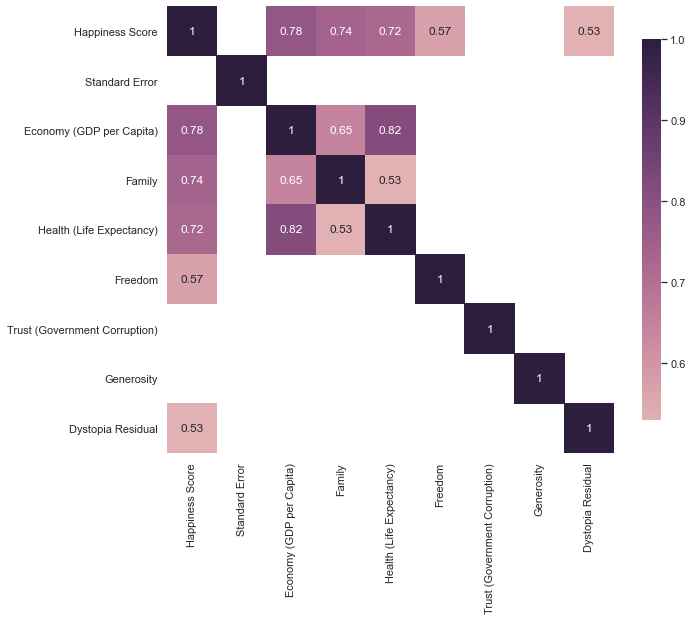

In [18]:
plt.figure(figsize=(10,10))
corr = np.array((data.iloc[:,3:].corr() <= 0.5) & (data.iloc[:,3:].corr() >= -0.5))
cmap = sns.cubehelix_palette(light=0.75, as_cmap=True)
sns.heatmap(data.iloc[:,3:].corr(),square=True,cmap=cmap, cbar_kws={"shrink": .7},annot=True,mask=corr)
plt.show()

* Economy, Family, Health, Freedom are highly correlated to Happiness Score
* Health and Economy are higly correlated
* Family and Economy, and Health and Family are moderately correlated

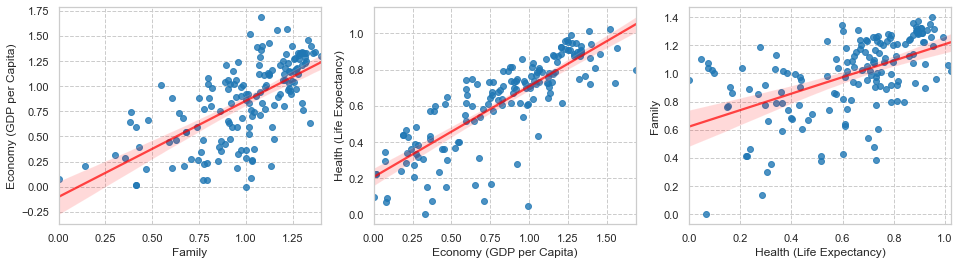

In [58]:
# Visualizing the scatter plot between the correlated features
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.regplot(data=data,y='Economy (GDP per Capita)', x='Family',line_kws={'color':'r','alpha':0.7},order=1)

plt.subplot(1,3,2)
sns.regplot(data=data,y='Health (Life Expectancy)', x='Economy (GDP per Capita)',line_kws={'color':'r','alpha':0.7},order=1)

plt.subplot(1,3,3)
sns.regplot(data=data,y='Family', x='Health (Life Expectancy)',line_kws={'color':'r','alpha':0.7},order=1)

plt.show()

In [59]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

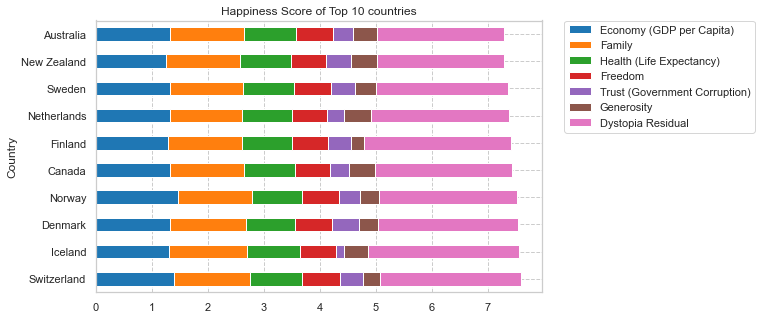

In [60]:
# Stacked plot of contributing factors of happiness score
ind = list(data.iloc[:,5:12].columns)
ind.append('Country')
data[ind].head(10).set_index('Country').plot(kind='barh',stacked=True,figsize=(8,5))
plt.title('Happiness Score of Top 10 countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The top 10 countries have almost equal contribtuion to the happiness score. 

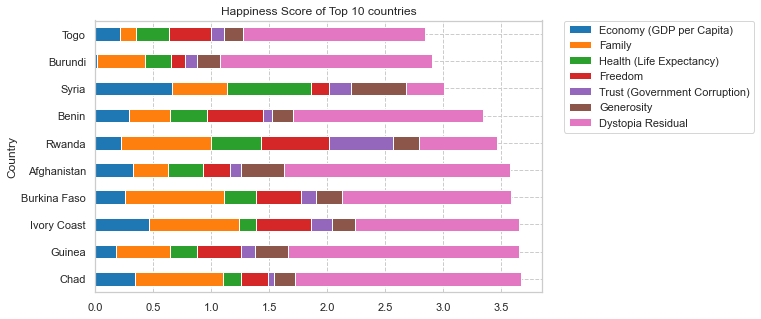

In [61]:
data[ind].tail(10).set_index('Country').plot(kind='barh',stacked=True,figsize=(8,5))
plt.title('Happiness Score of Top 10 countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Economy of Burundi is extremely low than the other countries

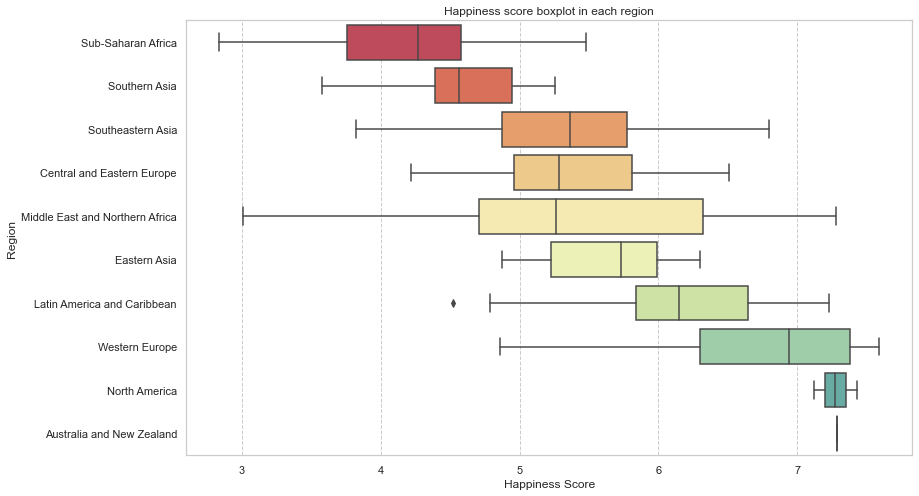

In [63]:
# Plot the range of happiness score in each regions
sorted_index = data.groupby('Region')['Happiness Score'].mean().sort_values().index
plt.figure(figsize=(13,8))
sns.boxplot(data=data,y='Region',x='Happiness Score',order=sorted_index,palette='Spectral')
plt.title('Happiness score boxplot in each region')
plt.show()

Regions with large range of happiness score is Middle East and Northen Africa

In [64]:
x = data.iloc[:,4:]
y = data.iloc[:,3]

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [67]:
x_n = MinMaxScaler().fit_transform(x)

In [68]:
x_scaled = pd.DataFrame(x_n)
x_scaled.columns = x.columns

In [77]:
import statsmodels.api as sm

In [78]:
x_scaled = MinMaxScaler().fit_transform(x)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.22)

In [80]:
model = sm.OLS(y_train,x_train).fit()

In [81]:
model_details = model.summary()
print(model_details)

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.405e+05
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                   1.31e-225
Time:                        23:19:00   Log-Likelihood:                          181.26
No. Observations:                 123   AIC:                                     -346.5
Df Residuals:                     115   BIC:                                     -324.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

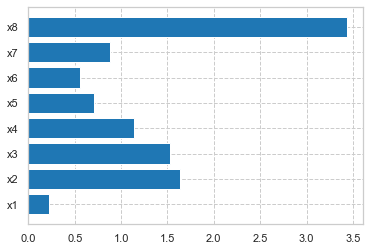

In [82]:
plt.barh(model.params.keys(),model.params)
plt.show()

Here we can see that the Standard Error feature has a very low importance, therfore we can remove that feature

In [83]:
model = sm.OLS(y,x_scaled[:,1:]).fit()

In [84]:
model_details = model.summary()
print(model_details)

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.626e+05
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                   2.90e-289
Time:                        23:20:18   Log-Likelihood:                          211.88
No. Observations:                 158   AIC:                                     -409.8
Df Residuals:                     151   BIC:                                     -388.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

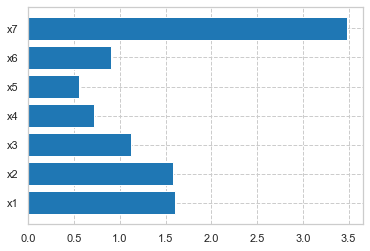

In [85]:
plt.barh(model.params.keys(),model.params)
plt.show()

In [88]:
y_pred = model.predict(x_test[:,1:])

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('R2S: ',r2_score(y_test,y_pred))

MAE:  0.05175717316827985
MSE:  0.003705090808460376
R2S:  0.9975160639903544


Oridinar Least square regression model has resulted in r2score of 0.99. 